## Recently at work I've been asked to do a few more charts based on pandas dataframes using pyplot. I was hitting a few walls and decided I needed some practice, so I played around with plotting some MBTA reliability data.

### To start, I accessed my ArcGIS profile. Mostly just out of habit.

<User username:ipurcell>
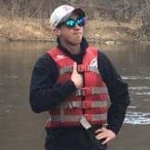

In [1]:
from arcgis import GIS
gis = GIS(profile='AGOL')
gis.users.me

### I then called the MBTA reliability data and brought it into a spatial dataframe.

<Item title:"MBTA Bus, Commuter Rail, & Rapid Transit Reliability" type:Table Layer owner:MBTAHUB_ADMIN>
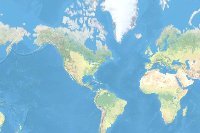

In [2]:
item = gis.content.get("b3a24561c2104422a78b593e92b566d5")
flayer = item.tables[0]
item

### I decided to focus on just the B branch of the green line during off peak hours. This wasn't meant to be any type of analysis, so I was just filtering to keep everything simple. 

### Also, on-time percentage(otp) isn't actually provided explicitly, so I added that field to do my analysis. 

In [3]:
from arcgis.features import SpatialDataFrame
sdf = flayer.query(where="gtfs_route_id='Green-B' AND peak_offpeak_ind='OFF_PEAK'").sdf
sdf = sdf.sort_values(by=['service_date'],ascending=True)
sdf['otp']=sdf['otp_numerator']/sdf['otp_denominator']
sdf

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,otp
1765,2016-01-01 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,1324.000000,1925.000000,None,526659,0.687792
1763,2016-01-02 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,2090.000000,2827.000000,None,526063,0.739300
1764,2016-01-03 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,1928.000000,2604.000000,None,526329,0.740399
1762,2016-01-04 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,1554.000000,2097.000000,None,525908,0.741059
1761,2016-01-05 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,1516.000000,2106.000000,None,525336,0.719848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-10-27 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6108.331107,7773.792733,None,1225,0.785759
3,2020-10-28 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6847.378669,8430.178937,None,1124,0.812246
2,2020-10-29 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6336.869178,8063.169831,None,693,0.785903
1,2020-10-30 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6028.711795,8128.912291,None,226,0.741638


### Since the main problem I'm having at work was trying to compare date ranges from two parts of the year, that's where I focuesed my efforts. I created two dataframes, one for March/April and the other for October. For some reason the September portion of the data is missing for the Green line, but honestly it doesn't really matter since I'm not actually trying to analyze anything.

In [4]:
march = sdf[(sdf['service_date']> "2020-03-01") & (sdf['service_date']< "2020-04-30")]
march = march.drop_duplicates(subset=['service_date','gtfs_route_id','otp'],keep='last')
march = march.reset_index(drop=True)
march

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,otp
0,2020-03-01 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6217.686,8098.763,None,49158,0.767733
1,2020-03-02 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6559.044,7965.951,None,48150,0.823385
2,2020-03-03 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6330.624,7738.086,None,47709,0.818112
3,2020-03-04 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6321.572,7607.287,None,46844,0.830989
4,2020-03-05 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6424.757,7719.432,None,46238,0.832284
5,2020-03-06 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6831.599,8019.922,None,45359,0.851829
6,2020-03-07 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,8464.082,10412.070,None,45225,0.812911
7,2020-03-08 05:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6937.504,8451.927,None,45165,0.820819
8,2020-03-09 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6884.518,7950.374,None,44077,0.865936
9,2020-03-10 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6833.078,7958.917,None,43484,0.858544


In [5]:
october = sdf[(sdf['service_date']> "2020-10-01") & (sdf['service_date']< "2020-10-31")]
october = october.reset_index(drop=True)
october

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,otp
0,2020-10-01 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6864.535770,8126.989727,None,8451,0.844659
1,2020-10-02 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6513.576425,8276.090609,None,8458,0.787035
2,2020-10-03 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,8534.534679,10528.168484,None,8226,0.810638
3,2020-10-04 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6957.505645,8239.424439,None,8162,0.844416
4,2020-10-05 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6007.202818,8151.053763,None,7802,0.736985
5,2020-10-06 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6799.207559,8271.092739,None,7510,0.822045
6,2020-10-07 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,5806.140449,7286.502767,None,7153,0.796835
7,2020-10-08 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6955.687722,8404.792387,None,6726,0.827586
8,2020-10-09 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,6730.336186,8261.961743,None,6236,0.814617
9,2020-10-10 04:00:00,Green-B,None,None,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,7692.629147,9633.543770,None,6270,0.798525


### The bread and butter. This is the section where I'm playing around with the charts. I'll leave in anything I find interesting. 
#### Documentation I'm pulling from [https://matplotlib.org/3.3.3/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py]

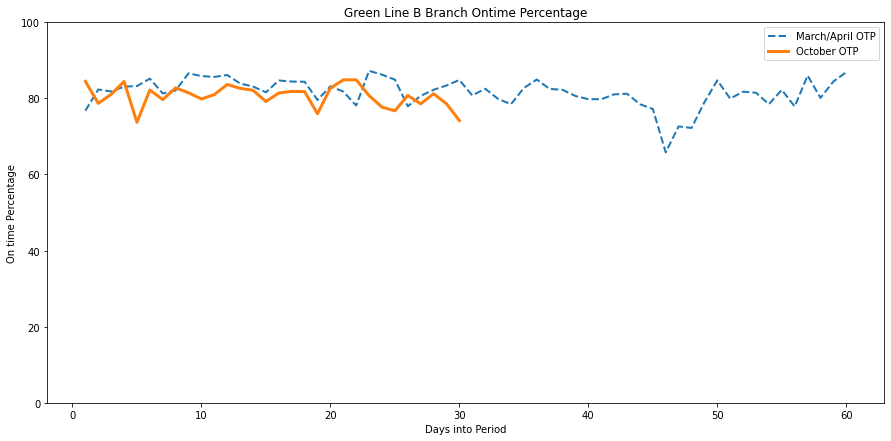

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))  # Create a figure and an axes.
ax.plot((march.index.values)+1, (march['otp'])*100, label='March/April OTP',linewidth=2, ls='--')  # Plot some data on the axes.
ax.plot(october.index.values+1, (october['otp'])*100, label='October OTP',lw=3)  # Plot more data on the axes...
ax.set_ylim(0,100) #Set y axis limit
ax.set_xlabel('Days into Period')  # Add an x-label to the axes.
ax.set_ylabel('On time Percentage')  # Add a y-label to the axes.
ax.set_title("Green Line B Branch Ontime Percentage")  # Add a title to the axes.
ax.legend()  # Add a legend.